# Tutorial 2- Two body problem

In this tutorial we will be looking at the classic two body problem and two different approaches to solve it numerically.  
We will look at the forward Euler method as the simplest numercial solution to an initial value problem as its a first order procedure.  
Lateron we will implement the leapfrog scheme, which is a second order method.  
  
To solve the two body problem, we decided to implement classes to work with as it makes the coding clearer and leaves it uncluttered.

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In the following code, a class "Euler" is defined. This object contains all the needed information of an Euler or leapfrog integrated Orbit. It is initialised by a starting vector $\vec{r_{0}}$, the initial velocity $\vec{v_{0}}$, the time stepsize h and the number of steps. 

The Class  contains functions to integrate the orbit from those values using the euler method, and the leapfrog method, as indicated in the code below.

In [57]:

class Euler():
    
    #Function initializes object, normalises r0,v0 to s0, w0 (see script page 6)
    def __init__(self, r_0, v_0, h, steps, threed=False):
        self.s_0 = np.array(r_0 / norm(r_0))
        self.w_0 = np.array(v_0 / np.sqrt(1 / norm(r_0)))
        self.h = h
        self.location = [self.s_0]
        self.velocity = [self.w_0]
        self.energies = [1 / 4 * norm(self.w_0) ** 2 - 1 / norm(self.s_0)]
        self.steps = steps 
        
        self.y_location = []
        self.x_location = []
        self.z_location = []
        self.threed = threed#if true, the object will contain information in 3d
        self.rel_Error = []

    #This function calculates each location, based on the last location and its velocity
    def loc(self, i):
        location_i = self.location[i - 1] + (self.velocity[i - 1] * self.h)
        self.location.append(location_i)
        
    #This function calculates each location, based on the last location and the velocity of the last half step    
    def loc_leap(self, i):
        location_i = self.location[-1] + (self.velocity[-1] * self.h)
        self.location.append(location_i)
    
    #This function calculates each velocity, based on the last location and its velocity
    def vel(self, i):
        velocity_i =  self.velocity[i - 1] - ((self.location[i - 1] / norm(self.location[i - 1]) ** 3) * self.h)
        self.velocity.append(velocity_i)
    
    #This function calculates each velocity, based on the last velocity and the position of the last half step        
    def vel_half(self, i):
        velocity_i =  self.velocity[i - 1] - ((self.location[i - 1] / norm(self.location[i - 1]) ** 3) * self.h*0.5)
        self.velocity.append(velocity_i)
    
    #This function calculates the energy, based on the currents steps velocity and position   
    def energy(self, i):
        e =  1 / 4 * norm(self.velocity[i]) ** 2 - 1 / norm(self.location[i])
        self.energies.append(e)

    #This function is a helper function, it splits the array of vectors into arrays of the x and y
    #location, so we can later implement a scatter plot
    def split(self):
        if self.threed == False:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
        else:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
                self.z_location.append(location[2])

    #This function calculates the relative energy error, based on the initial energy. Ideally this Error should
    # be 0, since energy is conserved
    def calc_rel_Error(self, i):
        rel_E_i = np.abs((self.energies[0] - self.energies[i])/self.energies[0])
        self.rel_Error.append(rel_E_i)
    
    #This function combines all Euler method calculations
    def calc(self):
        for i in range(1, self.steps):
            loc = self.loc(i)
            self.vel(i)
            self.energy(i)
            self.calc_rel_Error(i)
            
        self.split()
        
    #This function combines all Leap Frog method calculations
    def calc_leap(self):
        for i in range(1, self.steps):
            if i == 1:
                self.vel_half(i)
            else:
                self.vel(i)
            self.loc_leap(i)
            self.energy(i)
            self.calc_rel_Error(i)
        self.split()



## Part 1: Euler Integration

#### 1.1: Orbits with three different eccentricities
First, the two body problem was integrated using three different initial velocities, the result is shown in the following figure. 

As it can be seen below, the calculated function using the Euler method does "break out" sometimes, which means, that the Euler method isn't numerically stable in all cases.  

The first figure shows the orbit for the case, in which the two bodies should perform a circular movement. This is due to the orthogonality of the vectors of distance and velocity, as discussed in the tutorial.  
One can see, that while a circular movement is implemented, the Euler function does not provide us with a perfect or even closed circle. We will look onto that in the next part.  
  
$\vec{v_{0}}$ has been changed from being perpendicular to $\vec{s_{0}}$ in order to change the eccentricity.  
As shown in the figures below, the chosen changes are already enough to create an unstable outcome.  
  
Taking a look at the eccentricity and the trajectorie the following results show up:  
if the eccentricity is zero (e = 0) then we have a circular movement  
if e < 1 we get an elliptical movement  
and for e > 1 the movement becomes hyperbolic (with e = 1 as the limit case of a parabola).  
Circular end elliptical movements are bound, we get a real two body problem here. As for hyperbolic movements, there is only one movement.  
  
Due to the missing numerical stability of the Euler method, our function is unable to provide an elliptical or hyperbolic trajectorie, as well as a closed circle.

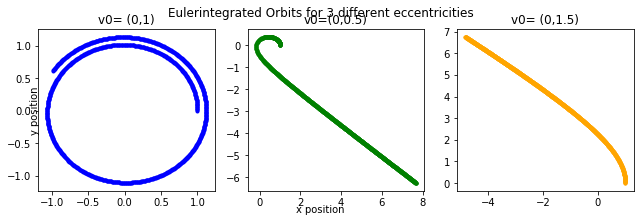

In [58]:
fig=plt.figure(figsize=(9,3))
fig.suptitle("Eulerintegrated Orbits for 3 different eccentricities")

fig.text(0.5, 0.04, 'x position', ha='center', va='center')
fig.text(0.06, 0.5, 'y position', ha='center', va='center', rotation='vertical')

ax1=plt.subplot(1,3,1)
ax1.set_title("v0= (0,1)")
C = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
C.calc()
ax1.scatter(C.x_location, C.y_location, c="blue", cmap='RdYlGn_r', marker=".")


ax2=plt.subplot(1,3,2)
ax2.set_title("v0=(0,0.5)")
A = Euler([1, 0], [0,0.5], 0.01, 1000, threed=False)
A.calc()
ax2.scatter(A.x_location, A.y_location, c="green", cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(1,3,3)
ax3.set_title("v0= (0,1.5)")
B = Euler([1, 0], [0,1.5], 0.01, 1000, threed=False)
B.calc()
ax3.scatter(B.x_location, B.y_location, c="orange", cmap='RdYlGn_r', marker=".")

plt.tight_layout()


#### 1.2 The effect of using different time Step sizes
Now we look at the effect the size of the time steps has on the orbit.
First we created 4  Orbits using the Eulermethod of intergration. The color of the orbit is mapped to the relative energy error of the calculation. As expected, in all 4 set ups, the Energy error gets bigger and bigger with time, represented by the darkening red colour. 

All 4 orbits are supposed to be circular, as their initial verlocity of $\vec{v_{0}}$=(0,1) is perpendicular to $\vec{s_{0}}$ (as discussed in tutorial)

As you can see below, the deformation of the orbits because of the error of the Euler Integration is most pronounced in the bigger stepsizes,as one might expect.The smaller the time steps, the less the orbit differs from a circle. For the smallest stepsize, the orbit almost looks perfectly circular, the unwanted "spiralisation" of the orbit is much smaller.




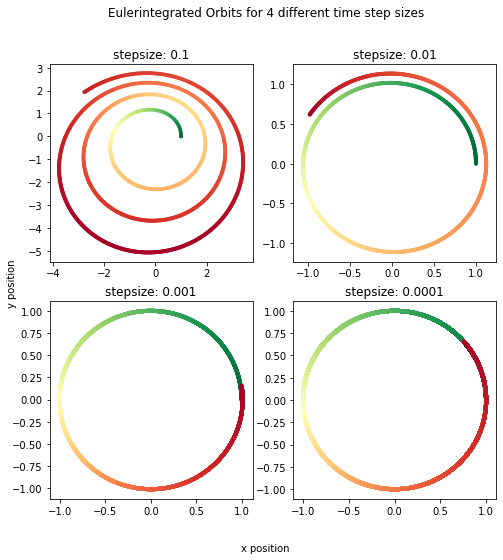

In [59]:
fig =plt.figure(figsize=(8,8))
fig.suptitle("Eulerintegrated Orbits for 4 different time step sizes")
ax1=plt.subplot(2,2,1)
ax1.set_title("stepsize: 0.1")
C = Euler([1, 0], [0,1], 0.1, 1000, threed=False)
C.calc()
ax1.scatter(C.x_location, C.y_location, c=C.energies, cmap='RdYlGn_r', marker=".")

fig.text(0.5, 0.04, 'x position', ha='center', va='center')
fig.text(0.06, 0.5, 'y position', ha='center', va='center', rotation='vertical')

ax2=plt.subplot(2,2,2)
ax2.set_title("stepsize: 0.01")
A = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
A.calc()
ax2.scatter(A.x_location, A.y_location, c=A.energies, cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(2,2,3)
ax3.set_title("stepsize: 0.001")
B = Euler([1, 0], [0,1], 0.001, 6500, threed=False)
B.calc()
ax3.scatter(B.x_location, B.y_location, c=B.energies, cmap='RdYlGn_r', marker=".")

ax4 =plt.subplot(2,2,4)
ax4.set_title("stepsize: 0.0001")
D = Euler([1, 0], [0,1], 0.0001, 70000, threed=False)
D.calc()
ax4.scatter(D.x_location, D.y_location, c=D.energies, cmap='RdYlGn_r', marker=".")





The effect of decreasing the stepsize on the error of the euler method is also shown in the following two diagramms. 

First, the relative error of each step the orbits calculated above was plotted.
Again, the smaller step size results in a much smaller error over the course of the calculation.

In the second diagramm, the Error at the very  end of the orbit was plotted against a variety of step sizes.

Looking at the way the Euler method works, this is exactly what would be expected. The accuracy of the global trunctation error is proportional to the stepsize h.  
(If we would look at the local trunctation error it would even be proportional to h$^{2}$. But for that we would assume that the result of the previous step is correct).  
It becomes clear, that we look at the global trunctuation error, if we look at the given formula of the energy error, which is said to be $\epsilon = \frac{|E_{i}-E_{0}|}{|E_{0}|}$.  
This shows how we are only comparing our energy to the start value and only expect this one to be true.  
Looking at the results, it becomes clear that the occuring error grows over time. Given that we get an error after each step and continue calculating based off this wrong result, it makes sense that the error increases.

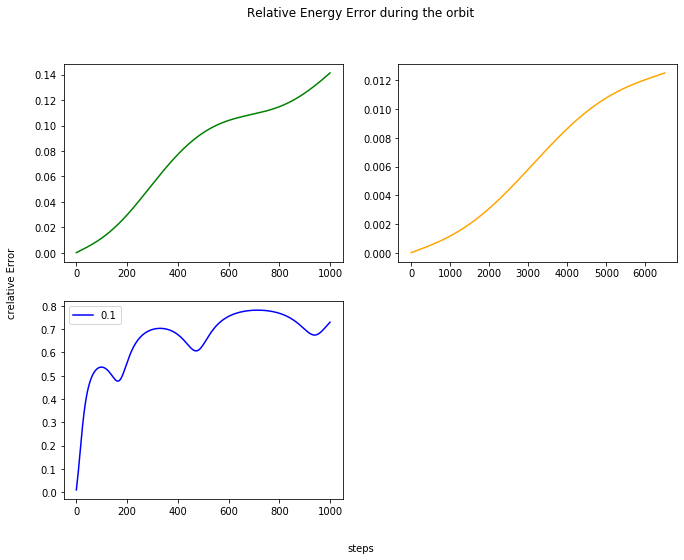

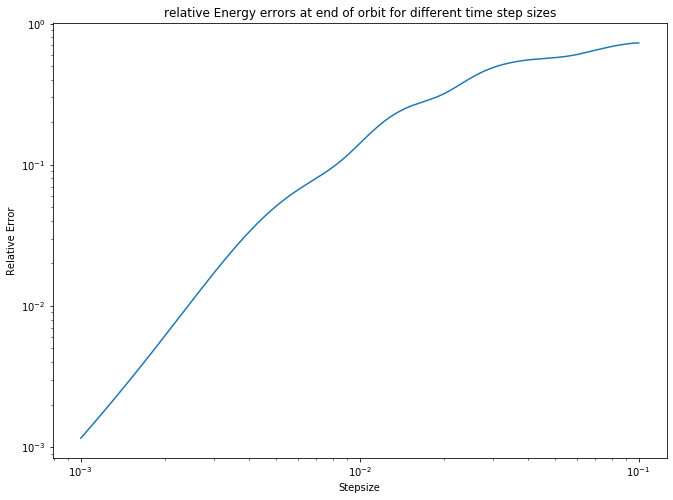

In [60]:
#plot energyerror over number of steps, using the objects used before
fig = plt.figure(figsize=(11,8))
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
fig.suptitle("Relative Energy Error during the orbit")
fig.text(0.5, 0.04, 'steps', ha='center', va='center')
fig.text(0.06, 0.5, 'relative Energy Error', ha='center', va='center', rotation='vertical')


ax1.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=f"{str(A.h)}", c="green")
ax2.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}", c="orange")
ax3.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}", c="blue")
plt.legend()

#for many orbits with a stepsize in the range from 0.1 to 0.001 the relative energy error at the end of the orbit is calculated
#then its plotted against the size of the time steps, on log scales
delta_t = np.linspace(0.1, 0.001, 1000)
rel_Error = []
for i in range(len(delta_t)):
    A = Euler([1, 0], [0,1], delta_t[i], 1000, threed=False)
    A.calc()
    rel_Error.append(np.abs((A.energies[-1]-A.energies[0])/A.energies[0]))   

plt.figure(figsize=(11,8))
plt.title("relative Energy errors at end of orbit for different time step sizes")
plt.xlabel("Stepsize")
plt.ylabel("Relative Energy Error")
plt.yscale("log")
plt.xscale("log")
plt.plot(delta_t, rel_Error)

## Part2 Leapfrog Integration

Next up the leapfrog integration is implemented.  
The code is pretty much the same as previously, because in this way it becomes easier to compare the results to the Euler method.  
Instead of "calc" the method "calc_leap" is used.  
  
As said before, the leapfrog method is a second order method. Therefore it is expected to create better results with smaller errors.  
In this method, velocity and distance vector are calculated alternately. The leapfrog method uses the same number of function evaluations per step. It should be way more stable than the Euler method (given that the time steps are constant and small enough).  
  
We start off by plotting the orbits for different eccentricities, using the same starting values as above.  
  
The first orbit is clearly a circle and in this case its even closed. So this is definetly an improvement. It is especially important to get a closed orbit, as this represents that the two bodies are bound.  
After setting the axes equal in the second figure, an ellipsis shows. As the eccentricity is < 1, this is expected. It is also expected to get a closed figure.  
So the leapfrog method gives better results in the first two cases.  
The third figure looks like its not giving us the trajectorie of the two body problem as needed. Given that we're expecting a hyperbolic trajectorie (examples for these can be seen at https://en.wikipedia.org/wiki/Hyperbolic_trajectory#/media/File:Hyperbolic_trajectories_with_different_impact_parameters.png). Our result doesn't look like that. To show that better, another plot with a smaller step size is added. This clearly shows that the leapfrog method doesnt give a good result in this case as well.

#### 2.1 different ecentricites
blabla die geschwindigkeiten machen das das dingsie ausbricht aus der ellipse

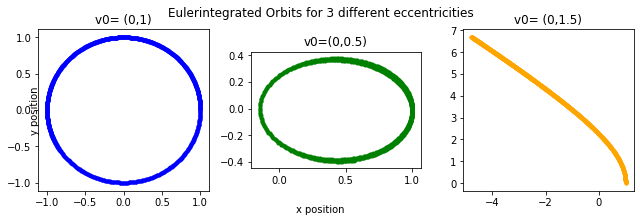

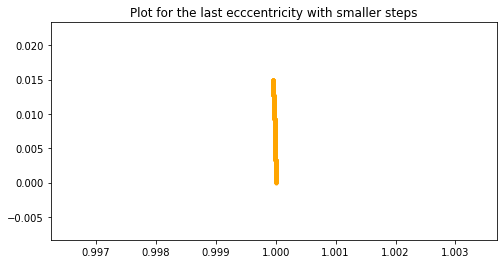

In [61]:


fig=plt.figure(figsize=(9,3))
fig.suptitle("Eulerintegrated Orbits for 3 different eccentricities")


ax1=plt.subplot(1,3,1)
ax1.set_title("v0= (0,1)")
C = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
C.calc_leap()
ax1.scatter(C.x_location, C.y_location, c="blue", cmap='RdYlGn_r', marker=".")


ax2=plt.subplot(1,3,2)
ax2.set_title("v0=(0,0.5)")
A = Euler([1, 0], [0,0.5], 0.01, 1000, threed=False)
A.calc_leap()
ax2.scatter(A.x_location, A.y_location, c="green", cmap='RdYlGn_r', marker=".")
plt.gca().set_aspect('equal', adjustable='box')


ax3=plt.subplot(1,3,3)
ax3.set_title("v0= (0,1.5)")
B = Euler([1, 0], [0,1.5], 0.01, 1000, threed=False)
B.calc_leap()
ax3.scatter(B.x_location, B.y_location, c="orange", cmap='RdYlGn_r', marker=".")

fig.text(0.5, 0.04, 'x position', ha='center', va='center')
fig.text(0.06, 0.5, 'y position', ha='center', va='center', rotation='vertical')
plt.tight_layout()


plt.figure(figsize=(8,4))
plt.title('Plot for the last ecccentricity with smaller steps')
plt.xlabel("Stepsize")
plt.ylabel("Relative Energy Error")
D = Euler([1, 0], [0,1.5], 0.00001, 1000, threed=False)
D.calc_leap()
plt.scatter(D.x_location, D.y_location, c="orange", cmap='RdYlGn_r', marker=".")


#### 2.2 different step sizes
just as before, we now plot the two body problem for 4 different time step sizes, using $\vec{v_{0}}$= (0,1) and $\vec{s_{0}}$= (1,0) just like previously.  
As expected an already seen above, we get a circular trajectory. But looking at the color code, we get a green part in every case. That means that the relative energy error is pretty small.  
Looking at the Euler results, one may notice that the green color is never mapped in the circle (even though in the "spiraling part"). That being said, it becomes clear that the "worst" calculation of leapfrog method (with the biggest time steps) still gives out better result than our best result of the Euler method.  
Also note, that the color code is the same in every plot. 

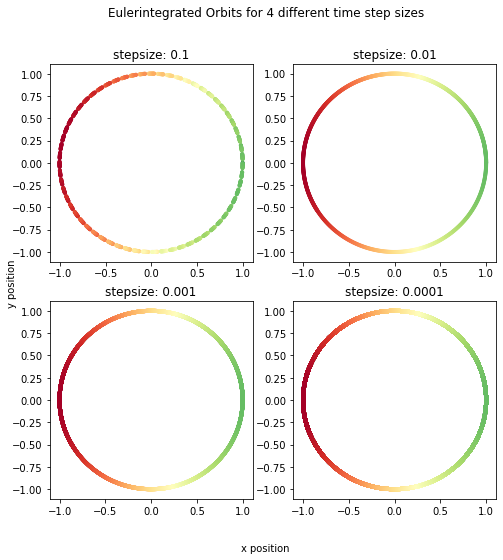

In [62]:
fig =plt.figure(figsize=(8,8))
fig.suptitle("Eulerintegrated Orbits for 4 different time step sizes")
ax1=plt.subplot(2,2,1)
ax1.set_title("stepsize: 0.1")
C = Euler([1, 0], [0,1], 0.1, 1000, threed=False)
C.calc_leap()
ax1.scatter(C.x_location, C.y_location, c=C.energies, cmap='RdYlGn_r', marker=".")
fig.text(0.5, 0.04, 'x position', ha='center', va='center')
fig.text(0.06, 0.5, 'y position', ha='center', va='center', rotation='vertical')

ax2=plt.subplot(2,2,2)
ax2.set_title("stepsize: 0.01")
A = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
A.calc_leap()
ax2.scatter(A.x_location, A.y_location, c=A.energies, cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(2,2,3)
ax3.set_title("stepsize: 0.001")
B = Euler([1, 0], [0,1], 0.001, 10000, threed=False)
B.calc_leap()
ax3.scatter(B.x_location, B.y_location, c=B.energies, cmap='RdYlGn_r', marker=".")

ax4 =plt.subplot(2,2,4)
ax4.set_title("stepsize: 0.0001")
D = Euler([1, 0], [0,1], 0.0001, 100000, threed=False)
D.calc_leap()
ax4.scatter(D.x_location, D.y_location, c=D.energies, cmap='RdYlGn_r', marker=".")





The leapfrog system applied to a hamiltonian system is symplectic. This means that in our case (as seen below) we get a limited energy error.  
The error corrects itself over time. The fluctuation of the energy calculated by the leapfrog method is consistent.  
When looking at a small step size it shows that the error is consistent at zero. This means that if the steps are small enough, the energy is conserved. This is a very satisfactory result.
  
In the first diagramme it can be seen that the energy error is smaller if the step size is smaller. This is again highlighted in the second diagramme.  
Even though the relative error grows (globally seen) over time, the growths is on a way smaller scale than the error of the Euler method.  
  
It should be mentioned that the leapfrog method gains its accuracy out of the alternating calculation of velocity and relative distance. Furthermore its reversible.  
Time reversibility guarantees the energy conservation. Even though the relative error might fluctuate, the global energy error is zero (because we return to our starting point).  
  
The conservation of energy (as well as angular momentum) because of the time reversibility is a grand advantage of the leapfrog method.

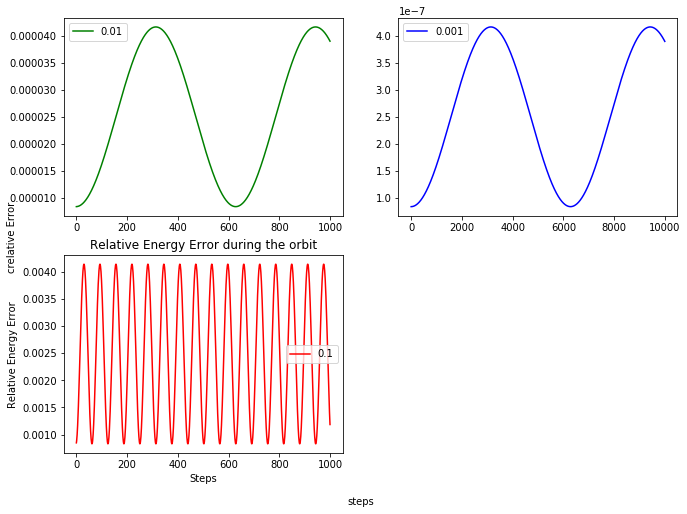

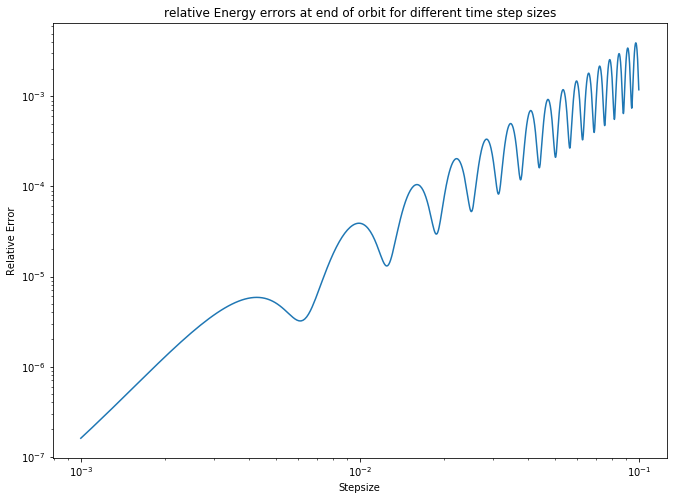

In [63]:
fig = plt.figure(figsize=(11,8))
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
plt.title("Relative Energy Error during the orbit")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
ax1.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=f"{str(A.h)}", c="green")
ax1.legend()
ax2.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}", c="blue")
ax2.legend()
ax3.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}", c="red")
ax3.legend()
fig.text(0.5, 0.04, 'steps', ha='center', va='center')
fig.text(0.06, 0.5, 'crelative Error', ha='center', va='center', rotation='vertical')


#for many orbits with a stepsize in the range from 0.1 to 0.001 the relative energy error at the end of the orbit is calculated
#then its plotted against the size of the time steps, on log scales
delta_t = np.linspace(0.1, 0.001, 1000)
rel_Error = []
for i in range(len(delta_t)):
    A = Euler([1, 0], [0,1], delta_t[i], 1000, threed=False)
    A.calc_leap()
    rel_Error.append(np.abs((A.energies[-1]-A.energies[0])/A.energies[0]))   

plt.figure(figsize=(11,8))
plt.title("relative Energy errors at end of orbit for different time step sizes")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
plt.plot(delta_t, rel_Error)